Fertilizer Recommendation System

In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import imblearn
from imblearn.over_sampling import SMOTE
from collections import Counter

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split

from sklearn.neighbors import  KNeighborsClassifier

from sklearn.metrics import accuracy_score, confusion_matrix
import pickle

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

In [27]:
DATA_PATH = "/content/dataset.csv"

<h2 align="center"> Fertilizer Recommendation System </h2>

<b>Attributes Description</b>
1. N - ratio of Nitrogen content in soil
2. P - ratio of Phosphorous content in soil
3. K - ratio of Potassium content in soil
4. temperature - temperature in degree Celsius
5. humidity - relative humidity in %
6. Moisture in Soil
7. Soil Type


<h3> Exploring the Data </h3>

In [28]:
data = pd.read_csv(DATA_PATH)
data.head()

,Temparature,Humidity,Moisture,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous,Fertilizer Name,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15
0,26,52,38,Sandy,Tomato,37,0,0,Urea,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,29,52,45,Loamy,Tomato,12,0,36,DAP,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,34,65,62,Black,Tomato,7,9,30,14-35-14,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,32,62,34,Red,Tomato,22,0,20,28-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,28,54,46,Clayey,Tomato,35,0,0,Urea,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [29]:
data["Fertilizer Name"].unique()

array(['Urea', 'DAP', '14-35-14', '28-28', '17-17-17', '20-20',
       '10/26/2026'], dtype=object)

In [ ]:
data.shape

(99, 9)

In [31]:
data["Soil Type"].unique()

array(['Sandy', 'Loamy', 'Black', 'Red', 'Clayey'], dtype=object)

In [30]:
data["Crop Type"].unique()

array(['Tomato'], dtype=object)

In [32]:
data.columns

Index(['Temparature', 'Humidity ', 'Moisture', 'Soil Type', 'Crop Type',
       'Nitrogen', 'Potassium', 'Phosphorous', 'Fertilizer Name', 'Unnamed: 9',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14', 'Unnamed: 15'],
      dtype='object')

<h3> Analysis </h3>

In [33]:
labels = data["Fertilizer Name"].unique()
counts = list(data["Fertilizer Name"].value_counts())

In [34]:
continuous_data_cols = ["Temparature", "Humidity ", "Moisture", "Nitrogen", "Phosphorous"]
categorical_data_cols = ["Soil Type", "Crop Type"]

<Figure size 2100x1700 with 0 Axes>

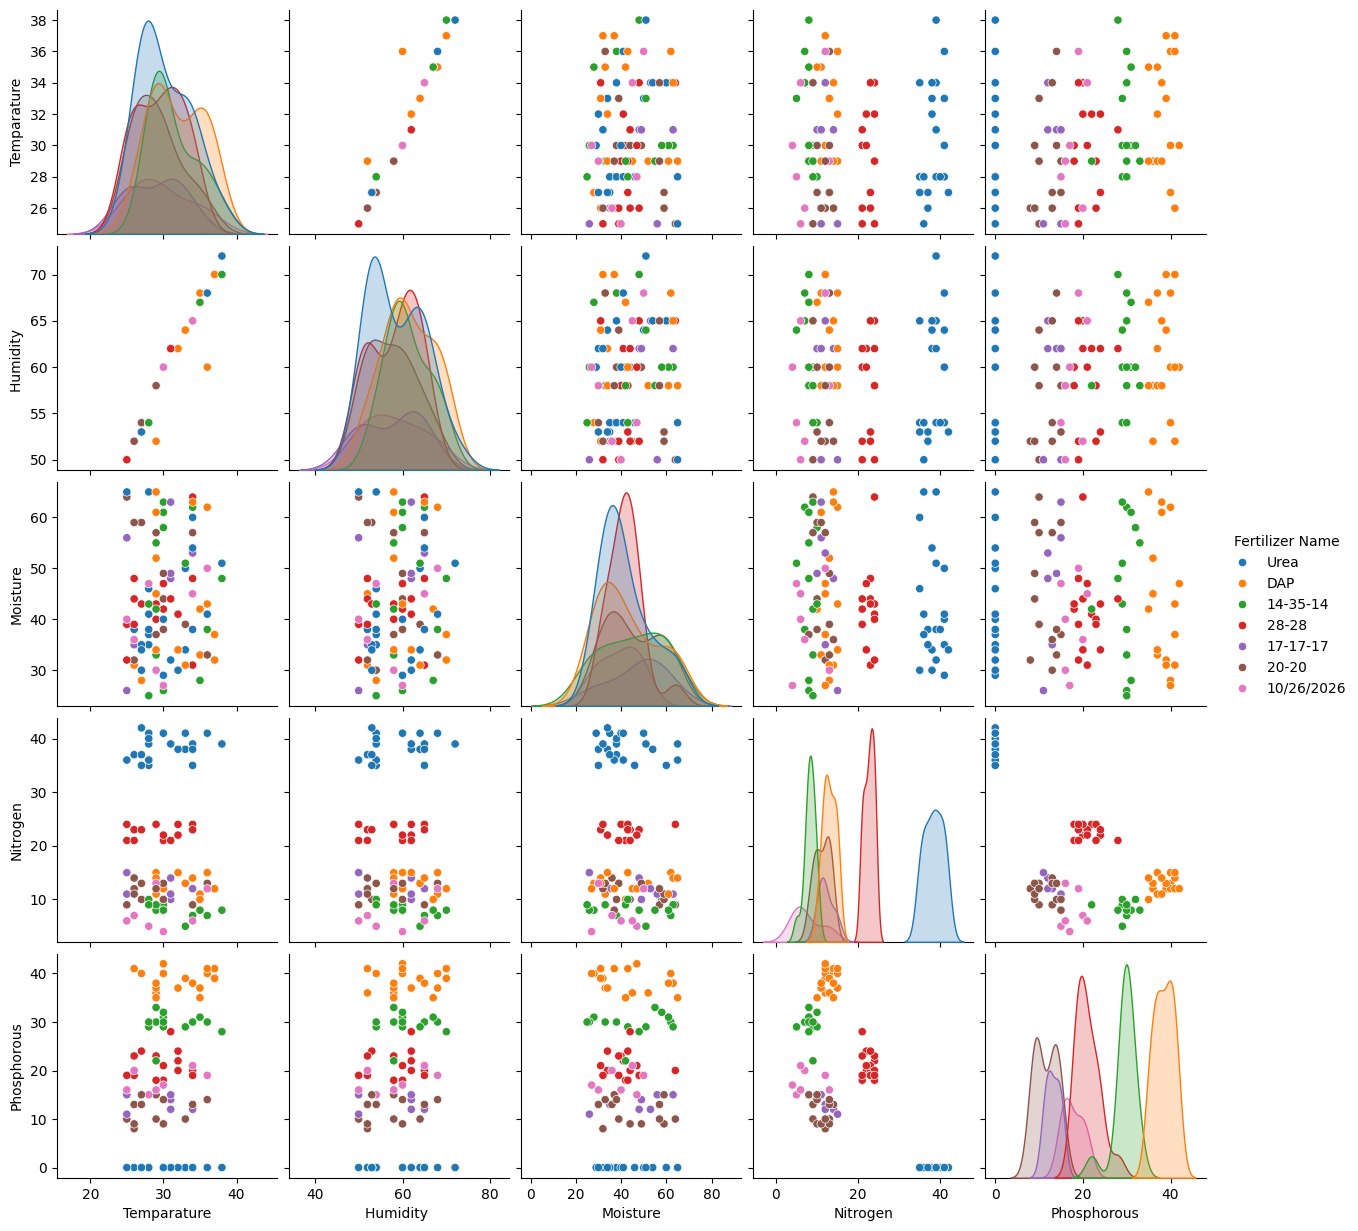

In [35]:
plt.figure(figsize=(21,17))
sns.pairplot(data[continuous_data_cols + ["Fertilizer Name"]], hue = "Fertilizer Name")
plt.show()

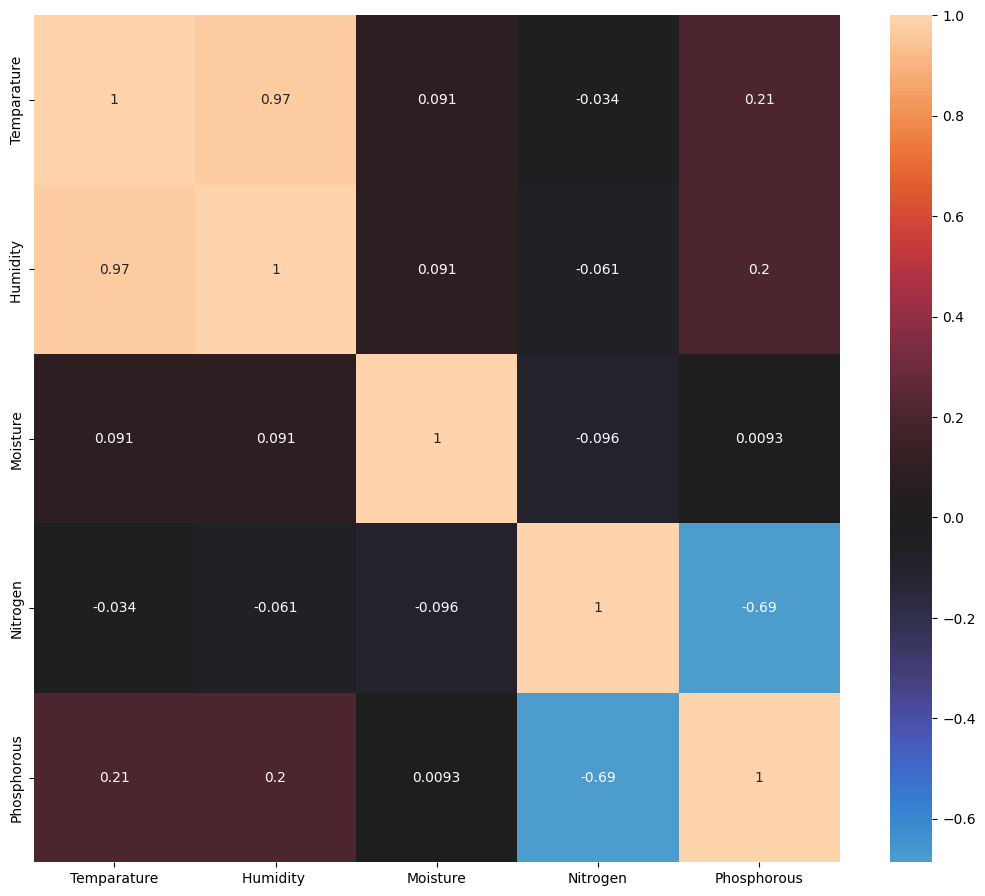

In [36]:
plt.figure(figsize = (13,11))
sns.heatmap(data[continuous_data_cols].corr(), center = 0, annot = True)
plt.show()


In [37]:
soil_type_label_encoder = LabelEncoder()
data["Soil Type"] = soil_type_label_encoder.fit_transform(data["Soil Type"])

In [38]:
crop_type_label_encoder = LabelEncoder()
data["Crop Type"] = crop_type_label_encoder.fit_transform(data["Crop Type"])

In [39]:
croptype_dict = {}
for i in range(len(data["Crop Type"].unique())):
    croptype_dict[i] = crop_type_label_encoder.inverse_transform([i])[0]
print(croptype_dict)

soiltype_dict = {}
for i in range(len(data["Soil Type"].unique())):
    soiltype_dict[i] = soil_type_label_encoder.inverse_transform([i])[0]
print(soiltype_dict)

{0: 'Tomato'}
{0: 'Black', 1: 'Clayey', 2: 'Loamy', 3: 'Red', 4: 'Sandy'}


In [40]:
fertname_label_encoder = LabelEncoder()
data["Fertilizer Name"] = fertname_label_encoder.fit_transform(data["Fertilizer Name"])

In [41]:
fertname_dict = {}
for i in range(len(data["Fertilizer Name"].unique())):
    fertname_dict[i] = fertname_label_encoder.inverse_transform([i])[0]
print(fertname_dict)

{0: '10/26/2026', 1: '14-35-14', 2: '17-17-17', 3: '20-20', 4: '28-28', 5: 'DAP', 6: 'Urea'}


In [42]:
data.head()

,Temparature,Humidity,Moisture,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous,Fertilizer Name,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15
0,26,52,38,4,0,37,0,0,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,29,52,45,2,0,12,0,36,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,34,65,62,0,0,7,9,30,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,32,62,34,3,0,22,0,20,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,28,54,46,1,0,35,0,0,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
X = data[data.columns[:-1]]
y = data[data.columns[-1]]

<h3> UpSampling the Data </h3>

In [ ]:
counter = Counter(y)
counter

Counter({6: 22, 5: 18, 1: 14, 4: 17, 2: 7, 3: 14, 0: 7})

In [ ]:
upsample = SMOTE()
X, y = upsample.fit_resample(X, y)
counter = Counter(y)
print(counter)

Counter({6: 22, 5: 22, 1: 22, 4: 22, 2: 22, 3: 22, 0: 22})


In [ ]:
print(f"Total Data after Upsampling: {len(X)}")

Total Data after Upsampling: 154


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X.values, y, test_size = 0.2, random_state = 0)
print(f"Train Data: {X_train.shape}, {y_train.shape}")
print(f"Train Data: {X_test.shape}, {y_test.shape}")

Train Data: (123, 8), (123,)
Train Data: (31, 8), (31,)


<h3 align="center"> KNN Classifier </h3>

Accuracy at k = 1 is 0.967741935483871
Accuracy at k = 2 is 0.8387096774193549
Accuracy at k = 3 is 0.9354838709677419
Accuracy at k = 4 is 0.7741935483870968
Accuracy at k = 5 is 0.7419354838709677
Accuracy at k = 6 is 0.8064516129032258
Accuracy at k = 7 is 0.7741935483870968
Accuracy at k = 8 is 0.7096774193548387
Accuracy at k = 9 is 0.7096774193548387
Accuracy at k = 10 is 0.6774193548387096
Accuracy at k = 11 is 0.7096774193548387
Accuracy at k = 12 is 0.7741935483870968
Accuracy at k = 13 is 0.7419354838709677
Accuracy at k = 14 is 0.7096774193548387
Accuracy at k = 15 is 0.7096774193548387
Accuracy at k = 16 is 0.6774193548387096
Accuracy at k = 17 is 0.6451612903225806
Accuracy at k = 18 is 0.5483870967741935
Accuracy at k = 19 is 0.5806451612903226
Accuracy at k = 20 is 0.5806451612903226
Accuracy at k = 21 is 0.5483870967741935
Accuracy at k = 22 is 0.5806451612903226
Accuracy at k = 23 is 0.5806451612903226
Accuracy at k = 24 is 0.5806451612903226
Accuracy at k = 25 is 0.58

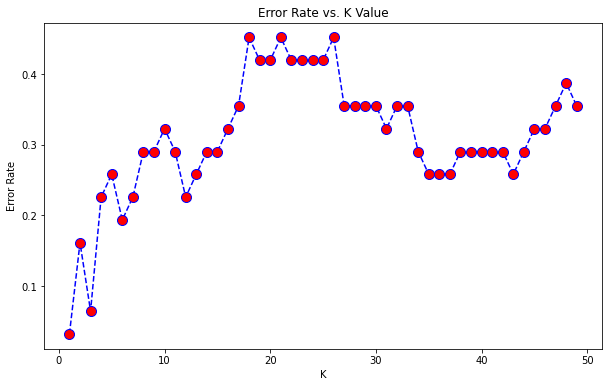

In [ ]:
error_rate = []
for i in range(1, 50):
    pipeline = make_pipeline(StandardScaler(), KNeighborsClassifier(n_neighbors = i))
    pipeline.fit(X_train, y_train)
    predictions = pipeline.predict(X_test)
    accuracy = accuracy_score(y_test, predictions)
    print(f"Accuracy at k = {i} is {accuracy}")
    error_rate.append(np.mean(predictions != y_test))

plt.figure(figsize=(10,6))
plt.plot(range(1,50),error_rate,color='blue', linestyle='dashed',
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
print("Minimum error:-",min(error_rate),"at K =",error_rate.index(min(error_rate))+1)